In [1]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'week', 100, "DESC")

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['week_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)

data_prices['type_continuous'] = type_continuous(data_prices, "ASC")


print(data_prices)




                             open    high   close     low  week_return  type  \
date                                                                           
2021-11-01 07:00:00+07:00  191.90  201.20  197.00  187.80     2.657634    up   
2021-10-25 07:00:00+07:00  190.40  205.00  191.90  171.10     0.787815    up   
2021-10-18 07:00:00+07:00  183.80  214.70  190.40  178.50     3.590860    up   
2021-10-11 07:00:00+07:00  174.80  193.00  183.70  166.30     5.091533    up   
2021-10-04 07:00:00+07:00  170.50  187.00  174.80  161.30     2.521994    up   
...                           ...     ...     ...     ...          ...   ...   
2020-01-06 07:00:00+07:00   43.29   51.95   51.43   43.16    18.803419    up   
2019-12-30 07:00:00+07:00   43.07   44.61   43.30   38.77     0.534014    up   
2019-12-23 07:00:00+07:00   41.84   43.76   43.08   39.38     2.963671    up   
2019-12-16 07:00:00+07:00   43.46   43.56   41.82   35.78    -3.773585  down   
2019-12-09 07:00:00+07:00   45.55   45.8

type_continuous
0    48
2    26
3    14
4     7
5     3
6     2
dtype: int64


<Figure size 432x288 with 0 Axes>

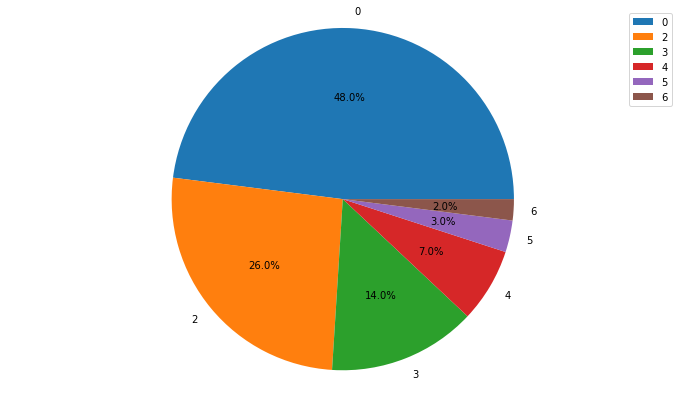

In [2]:
type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()